Let's consider two continous non-independet random variables $X,Y$ with the joint probability density.

$$\frac{dP_{(X,Y)}}{d\lambda_L^2}(x,y) = \frac{\sqrt{15/16}}{2 \pi}e^{-0.5((x-5)^2 + (y-3)^2 + 0.5*(x-5)(y-3))}$$ 

The density above could represent two stocks $X,Y$ which are correlated with each other.

**Exercise 1:**
Calculate the following expressions:
1. The expectation value of $X$. $(E[X] = \int dP_{(X,Y)}(x,y) x)$
2. The expectation value of $Y$. $(E[Y] = \int dP_{(X,Y)}(x,y) y)$
3. Calculate $Var[X] = E[X^2] - (E[X])^2$
4. Calculate $Var[Y] = E[Y^2] - (E[Y])^2$
3. The Covariance which is defined by $Cov[X,Y] = \frac{E[(X-E[X])(Y-E[Y])]}{\sqrt{Var[X]Var[Y]}}$

In [1]:
import numpy as np
from numpy import linalg
from scipy.integrate import nquad, quad
from matplotlib import pyplot as plt
%matplotlib inline

# prob of X,Y
p = lambda x,y: np.sqrt(15./16)/(2*np.pi)*np.exp(-0.5*((x-5)**2 + (y-3)**2 + 0.5*(x-5)*(y-3)))

E = lambda f: nquad(lambda x,y: f(x,y)*p(x,y), [[-np.infty, np.infty],[-np.infty, np.infty]])[0]
fx = lambda x,y : x
fy = lambda x,y : y
fx2 = lambda x,y:x**2
fy2 = lambda x,y:y**2
Efx = E(fx)
print Efx
Efy = E(fy)
print E(fy)


fxy = lambda x,y: (x-Efx)*(y-Efy)
varx = E(fx2) - Efx**2
print varx
vary = E(fy2) - Efy**2
print vary
cov = E(fxy)/np.sqrt(varx*vary)
print cov


4.9999999995
3.00000000044
1.06666667102
1.06666666358
-0.24999999941


**Exercise 2:**
    
Calculate and plot the marginal probability denisty defined by 
$$\frac{dP_X}{d\lambda_L}(x) = \int_{y = - \infty}^{y = \infty} d\lambda_L(y) \frac{dP_{(X,Y)}}{d\lambda_L^2}(x,y)$$

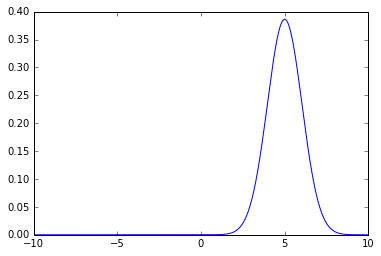

In [48]:
px = lambda x: quad(lambda y: p(x,y), -np.infty, np.infty)[0]
px = np.vectorize(px)
X = np.arange(-10,10,0.01)
plt.plot(X,px(X))

In [49]:
px2 = lambda x: quad(lambda y: p(x,y), -np.infty, np.infty)[0]
X = np.arange(-10,10,0.01)
my_list = []
for x in X:
    my_list.append(px2(x))

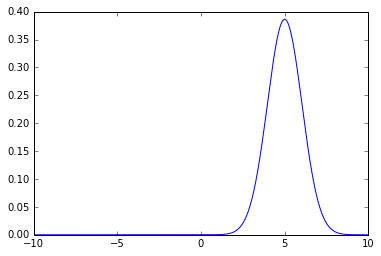

In [50]:
plt.plot(X,my_list)

**Excersie 3:**

* Calculate the conditional probability $P(Y<3 | X>5) = \frac{P(Y<3 \cap X>5)}{P(X>5)}$. 
* If you use this model to model two stocks and use the result from exercise 1 how could you interpret the conditional expectation value?

In [93]:
condP = nquad(p, [[5, np.infty],[-np.infty,3]])[0]/quad(px, 5,np.infty)[0]
print('{0: .2%}'.format(condP))

 58.04%
